In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess
import os
import warnings
from ipywidgets import interactive
warnings.filterwarnings('ignore')
from scripts.data_cleaning import get_data, clean_data, check_missing_values, miliseconds_to_seconds, seconds_to_mmss

# Load the data

In [2]:
dataset = get_data(os.path.join('..', 'data', 'spotify_data.csv'))
dataset.replace('None', np.nan, inplace=True)
dataset.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


# Data cleaning

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [4]:
dataset.shape

(1159764, 20)

In [5]:
check_missing_values(dataset)

There are 16 missing values in the dataset


16

We can get some descriptive statistics of the dataset

In [6]:
pd.set_option('display.float_format', '{:.3f}'.format)
dataset.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000,1159764.000
mean,659061.322,18.383,2011.955,0.537,0.640,5.288,-8.981,0.635,0.093,0.322,0.252,0.223,0.456,121.377,249561.781,3.886
std,428549.154,15.886,6.804,0.184,0.271,3.555,5.682,0.482,0.127,0.355,0.365,0.201,0.269,29.780,149426.165,0.468
min,0.000,0.000,2000.000,0.000,0.000,0.000,-58.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2073.000,0.000
25%,289940.750,5.000,2006.000,0.413,0.454,2.000,-10.829,0.000,0.037,0.006,0.000,0.098,0.226,98.797,181091.000,4.000
50%,579881.500,15.000,2012.000,0.550,0.694,5.000,-7.450,1.000,0.051,0.147,0.002,0.134,0.438,121.931,225744.000,4.000
75%,1031689.250,29.000,2018.000,0.677,0.873,8.000,-5.276,1.000,0.089,0.640,0.614,0.292,0.674,139.903,286913.500,4.000
max,1473395.000,100.000,2023.000,0.993,1.000,11.000,6.172,1.000,0.971,0.996,1.000,1.000,1.000,249.993,6000495.000,5.000


In [7]:
dataset.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.043,0.694,0.000,0.115,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.026,0.477,0.000,0.097,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.032,0.338,0.000,0.089,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.036,0.807,0.000,0.080,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.030,0.073,0.019,0.110,0.217,171.864,244320,4


we can now remove the missing values
we also want to remove the redundant `id` column as it does not provide any useful information

we can see that `loudness` goes up to 6.172, which is not possible according to the Spotify API documentation.

we can also see that `time_signature` has a minimum value of 0 while the minimum value should be 3.

In [8]:
dataset = clean_data(dataset)
assert check_missing_values(dataset) == 0

No missing values in the dataset


We want to add a new column `duration_s` which will contain the duration of the track in seconds, and a new column `duration_mm:ss` which will contain the duration of the track in the format `mm:ss` so that it is easier to read.

In [9]:
dataset = miliseconds_to_seconds(dataset)
dataset = seconds_to_mmss(dataset)

In [10]:
dataset.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_s
count,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000,1144681.000
mean,18.419,2011.953,0.540,0.642,5.289,-8.926,0.634,0.092,0.319,0.251,0.223,0.458,121.619,250022.154,3.922,250.022
std,15.896,6.803,0.183,0.269,3.555,5.598,0.482,0.125,0.353,0.364,0.201,0.268,29.509,148231.968,0.335,148.232
min,0.000,2000.000,0.022,0.000,0.000,-58.100,0.000,0.022,0.000,0.000,0.006,0.000,30.766,15000.000,3.000,15.000
25%,5.000,2006.000,0.416,0.458,2.000,-10.756,0.000,0.037,0.006,0.000,0.098,0.229,99.021,181707.000,4.000,181.707
50%,15.000,2012.000,0.552,0.695,5.000,-7.425,1.000,0.051,0.144,0.002,0.134,0.440,121.990,226080.000,4.000,226.080
75%,29.000,2018.000,0.678,0.873,8.000,-5.270,1.000,0.089,0.632,0.606,0.291,0.675,139.930,287200.000,4.000,287.200
max,100.000,2023.000,0.993,1.000,11.000,0.000,1.000,0.970,0.996,1.000,1.000,1.000,249.993,6000461.000,5.000,6000.461


In [11]:
dataset.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_s,duration_mm:ss
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.043,0.694,0.000,0.115,0.139,133.406,240166,3,240.166,4:00
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,...,0.026,0.477,0.000,0.097,0.515,140.182,216387,4,216.387,3:36
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,...,0.032,0.338,0.000,0.089,0.145,139.832,158960,4,158.960,2:38
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,...,0.036,0.807,0.000,0.080,0.508,204.961,304293,4,304.293,5:04
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,...,0.030,0.073,0.019,0.110,0.217,171.864,244320,4,244.320,4:04


We can now get some more insights from the dataset

In [12]:
dataset[['track_id', 'artist_name', 'genre']].nunique().rename('unique_values')

track_id       1144681
artist_name      64017
genre               82
Name: unique_values, dtype: int64

We can see that there are over 1 million unique tracks in the dataset, with over 60,000 unique artists and 82 unique genres

# Data visualization

We can now visualize the data to get some more insights

Let's start by analyzing the trend of the number of tracks released over the years

In [13]:
from scripts.data_visualisation import create_sample, plot_data, top_tracks_per_genre, top_tracks_per_artist

## Number of tracks released each year

Number of tracks each year:
    year  count
0   2000  43473
1   2001  41758
2   2002  41592
3   2003  41796
4   2004  42880
5   2005  43202
6   2006  44918
7   2007  45427
8   2008  46858
9   2009  46237
10  2010  46228
11  2011  45905
12  2012  54139
13  2013  52591
14  2014  52453
15  2015  50924
16  2016  39798
17  2017  55459
18  2018  55774
19  2019  55034
20  2020  54273
21  2021  52893
22  2022  52991
23  2023  38078
Year with the highest number of tracks: 2018 with 55774 tracks
Year with the lowest number of tracks: 2023 with 38078 tracks


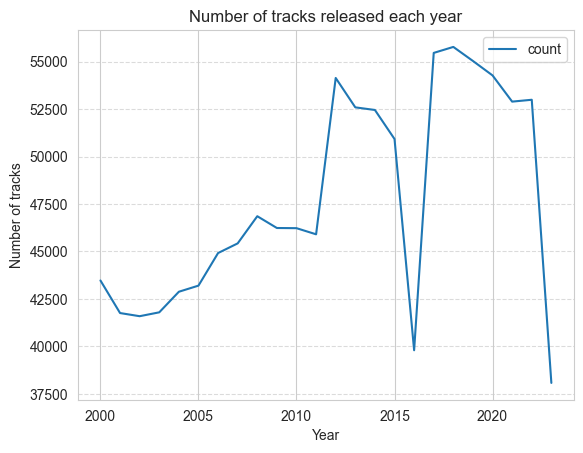

In [14]:
songs_per_year = dataset.groupby('year').size().reset_index(name='count')
print(f"Number of tracks each year:\n{songs_per_year}")

highest_year = songs_per_year.loc[songs_per_year['count'].idxmax()]
print(f"Year with the highest number of tracks: {highest_year['year']} with {highest_year['count']} tracks")

lowest_year = songs_per_year.loc[songs_per_year['count'].idxmin()]
print(f"Year with the lowest number of tracks: {lowest_year['year']} with {lowest_year['count']} tracks")

songs_per_year.plot(x='year', y='count', kind='line', title='Number of tracks released each year')
plt.xlabel('Year')
plt.ylabel('Number of tracks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the number of tracks released has been increasing over the years, with a significant drop in 2016, and a peak in 2018. The number of tracks started to decrease again after hitting the 2018 peak. This could be due to the fact that the dataset was collected in 2023, and the number of tracks released in 2023 is lower than the previous years because the dataset was collected before the year ended.

## Number of artists releasing tracks each year

Number of artists releasing tracks each year:
    year  count
0   2000   5857
1   2001   5759
2   2002   6035
3   2003   6094
4   2004   6600
5   2005   6869
6   2006   7241
7   2007   7723
8   2008   7993
9   2009   8066
10  2010   8482
11  2011   8597
12  2012   9561
13  2013   9799
14  2014  10271
15  2015  10289
16  2016   8975
17  2017  12343
18  2018  13143
19  2019  13821
20  2020  14190
21  2021  13835
22  2022  12722
23  2023  10987
Year with the highest number of artists: 2020 with 14190 artists releasing that year
Year with the lowest number of artists: 2001 with 5759 artists releasing that year


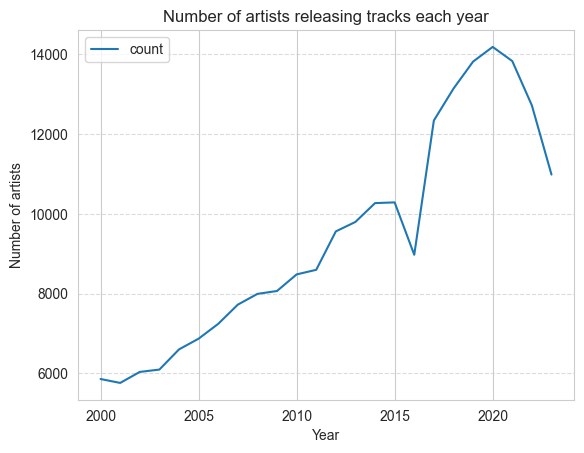

In [15]:
artists_per_year = dataset.groupby('year')['artist_name'].nunique().reset_index(name='count')
print(f"Number of artists releasing tracks each year:\n{artists_per_year}")

highest_year = artists_per_year.loc[artists_per_year['count'].idxmax()]
print(f"Year with the highest number of artists: {highest_year['year']} with {highest_year['count']} artists releasing that year")

lowest_year = artists_per_year.loc[artists_per_year['count'].idxmin()]
print(f"Year with the lowest number of artists: {lowest_year['year']} with {lowest_year['count']} artists releasing that year")

artists_per_year.plot(x='year', y='count', kind='line', title='Number of artists releasing tracks each year')
plt.xlabel('Year')
plt.ylabel('Number of artists')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the number of artists releasing tracks has been increasing over the years, which means that more and more arttist decide to release their music. Number of releasing artist has hit an all-time peak in 2020, which could be due to fact that it is easier to release music now than ever before, thanks to the internet and the rise of music streaming platforms.

## Number of tracks released in each genre

Number of tracks released in each genre:
             genre  count
4      black-metal  21467
33          gospel  21425
0         acoustic  20869
2         alt-rock  20831
26             emo  20720
..             ...    ...
8    chicago-house   5168
22         dubstep   4736
18  detroit-techno   3908
63            rock   3309
74      songwriter    581

[82 rows x 2 columns]
Top 10 genres with the highest number of tracks:
          genre  count
4   black-metal  21467
33       gospel  21425
0      acoustic  20869
2      alt-rock  20831
26          emo  20720
3       ambient  20584
44       indian  20132
48        k-pop  19901
5         blues  19535
52      new-age  19472
Genre with the highest number of tracks: black-metal with 21467 tracks
Genre with the lowest number of tracks: songwriter with 581 tracks


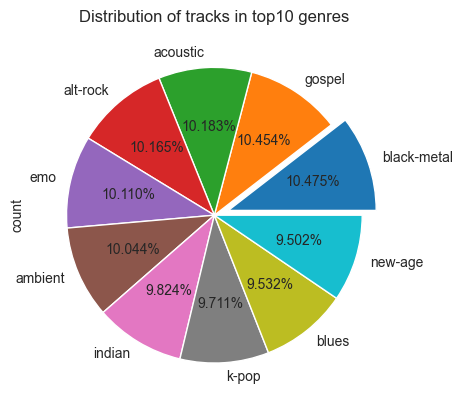

In [16]:
tracks_by_genre = dataset.groupby('genre').size().reset_index(name='count')
tracks_by_genre = tracks_by_genre.sort_values(by='count', ascending=False)
print(f"Number of tracks released in each genre:\n{tracks_by_genre}")

top_10_genres = tracks_by_genre.head(10)
print(f"Top 10 genres with the highest number of tracks:\n{top_10_genres}")

highest_genre = tracks_by_genre.loc[tracks_by_genre['count'].idxmax()]
print(f"Genre with the highest number of tracks: {highest_genre['genre']} with {highest_genre['count']} tracks")

lowest_genre = tracks_by_genre.loc[tracks_by_genre['count'].idxmin()]
print(f"Genre with the lowest number of tracks: {lowest_genre['genre']} with {lowest_genre['count']} tracks")

explode = [0.1 if genre == highest_genre['genre'] else 0 for genre in top_10_genres['genre']]
top_10_genres.plot(x='genre', y='count', kind='pie', title='Distribution of tracks in top10 genres', labels=top_10_genres['genre'], legend=False, autopct='%1.3f%%', explode=explode)
plt.show()

## Evolution of the duration of tracks over the years

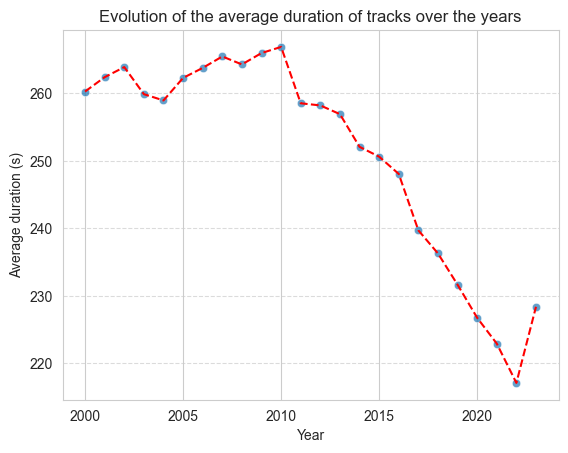

In [17]:
duration_per_year = dataset.groupby('year')['duration_s'].mean().reset_index(name='average_duration')

sns.scatterplot(x='year', y='average_duration', data=duration_per_year, alpha=0.7)
smoothed = lowess(duration_per_year['average_duration'], duration_per_year['year'], frac=0.1)
smoothed_x, smoothed_y = smoothed.T
plt.plot(smoothed_x, smoothed_y, 'r--')
plt.title('Evolution of the average duration of tracks over the years')
plt.xlabel('Year')
plt.ylabel('Average duration (s)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the average duration of tracks has been decreasing over the years, with a peak in 2016.
By analyzing this trend, we can better understand how the music industry has changed over time and adapted to changes in audience preferences. It is possible that shorter songs have become more popular due to changes in the way music is consumed or because of the faster pace of life.

Considering the uptick in average song duration post-2021, it's conceivable that this increase may be attributed to the prominence of streaming platforms. These platforms afford artists the freedom to release longer songs, unrestricted by the limitations of radio airplay.

## Longest and shortest tracks

In [18]:
longest_tracks = dataset.sort_values(by='duration_s', ascending=False).head(10)
longest_tracks[['artist_name', 'track_name', 'duration_s', 'duration_mm:ss']]

,artist_name,track_name,duration_s,duration_mm:ss
103376,Nature Sounds,Rainstorm Ambience with Thunder Rolls and Peels,6000.461,100:00
103634,Nature Sounds,Tranquil Rain Shower Ambience,6000.328,100:00
103697,Nature Sounds,Beachside Rolling Wave Ambience,6000.161,100:00
156967,Nature Sounds,"Natural Waterfall Flow, Drop and Mild Spray (W...",6000.061,100:00
103592,Nature Sounds,Constant Small Waterfall Stream,6000.061,100:00
1109593,Zen Mindwaves,7.83 Hz Schumann Earth Resonance Binaural Pure...,5969.768,99:29
124546,John B,Drum & Bass 2014: Summer Sessions - Warm up Mix,5780.846,96:20
348093,Celer,Wind Gallery I-III,5679.922,94:39
113961,Roni Size,Take Kontrol - Continuous Mix,5569.629,92:49
260074,DJ Pierre,Wild Pitch: The Story - Continuous Mix,5504.000,91:44


We can see that this statistics is not completely representable, since the longest tracks are more than 1 hour long mixes, which are not actual songs.

In [19]:
shortest_tracks = dataset.sort_values(by='duration_s').head(10)
shortest_tracks[['artist_name', 'track_name', 'duration_s', 'duration_mm:ss']]

,artist_name,track_name,duration_s,duration_mm:ss
81133,Document 6,Tod,15.000,0:15
1105004,Ray Campi,Jimmie Skinner Spoken Word,15.013,0:15
280367,Rabujos,A Utopia Morreu Devorada pela Febre da História,15.019,0:15
772031,Agoraphobic Nosebleed,Crawling Out of the Cradle Into the Casket,15.027,0:15
888758,Moes Haven,Alien Rockabilly,15.040,0:15
239446,Plague Rages,Queda,15.048,0:15
772081,Agoraphobic Nosebleed,Thawing Out,15.053,0:15
949523,Weekend Nachos,Klan Scouts,15.067,0:15
520202,Elvis Presley,Are You Lonesome Tonight? - Fragment-Impromptu...,15.107,0:15
895268,Armin van Buuren,A State Of Trance [ASOT 280] - Outro,15.140,0:15


# Analysis of popularity

## Most popular artists
This is the list of artists with the highest average popularity on their tracks

In [20]:
most_popular_artists = dataset.groupby('artist_name')['popularity'].mean().reset_index(name='average_popularity')
most_popular_artists = most_popular_artists.sort_values(by='average_popularity', ascending=False)
most_popular_artists.head(10)

,artist_name,average_popularity
39970,NewJeans,85.333
17160,Elley Duhé,85.000
45847,Rema,80.667
27301,Jogja Hip Hop Foundation,80.000
52556,SunKissed Lola,80.000
20137,Fujii Kaze,80.000
9701,Chani Nattan,80.000
10572,Cian Ducrot,79.000
42034,Oxlade,79.000
50832,Soegi Bornean,78.000


## Most popular tracks

In [21]:
most_popular_tracks = dataset.sort_values(by='popularity', ascending=False).head(10)
most_popular_tracks[['artist_name', 'track_name', 'popularity', 'genre']]

,artist_name,track_name,popularity,genre
612503,Miley Cyrus,Flowers,100,pop
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96,hip-hop
612504,The Weeknd,Die For You - Remix,95,pop
569184,SZA,Kill Bill,94,pop
569191,Rema,Calm Down (with Selena Gomez),93,pop
541577,David Guetta,I'm Good (Blue),93,dance
569195,Manuel Turizo,La Bachata,93,pop
608232,NewJeans,OMG,92,k-pop
560200,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",92,hip-hop
569188,d4vd,Here With Me,92,pop


## Most popular genres

In [22]:
most_popular_genres = dataset.groupby('genre')['popularity'].mean().reset_index(name='average_popularity')
most_popular_genres = most_popular_genres.sort_values(by='average_popularity', ascending=False)
most_popular_genres.head(10)

,genre,average_popularity
56,pop,55.678
42,hip-hop,46.319
63,rock,46.222
14,dance,43.045
49,metal,39.701
2,alt-rock,38.605
66,sad,36.054
45,indie-pop,35.555
27,folk,33.437
13,country,33.050


we can see that the most popular genre is `pop`, which is consistent with the fact that most of the top10 most popular tracks are from the `pop` genre

## Popularity over the years
We can analyze the trend of the average popularity of tracks over the years, along with the most popular song and most popular genre every year

## Average popularity of tracks over the years

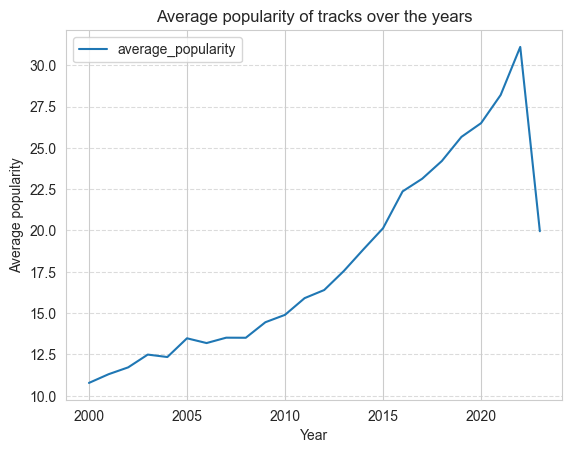

In [23]:
popularity_per_year = dataset.groupby('year')['popularity'].mean().reset_index(name='average_popularity')

popularity_per_year.plot(x='year', y='average_popularity', kind='line', title='Average popularity of tracks over the years')
plt.xlabel('Year')
plt.ylabel('Average popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that the average popularity of tracks has been increasing over the years, with a peak in 2018, which means that the music industry has been growing and becoming more popular over the years.

## Most popular song each year

In [24]:
most_popular_song_per_year = dataset.loc[dataset.groupby('year')['popularity'].idxmax()][['year', 'artist_name', 'track_name', 'popularity', 'genre']]
most_popular_song_per_year

,year,artist_name,track_name,popularity,genre
645970,2000,Eminem,The Real Slim Shady,86,hip-hop
693903,2001,System Of A Down,Chop Suey!,82,metal
732739,2002,Eminem,Without Me,87,hip-hop
779182,2003,Linkin Park,Numb,84,metal
817977,2004,Eminem,Mockingbird,90,hip-hop
845634,2005,Shakira,Hips Don't Lie (feat. Wyclef Jean),84,dance
889676,2006,Nelly Furtado,Promiscuous,82,dance
946079,2007,Arctic Monkeys,505,80,garage
1010871,2008,Kings of Leon,Sex on Fire,80,rock
1047470,2009,JAY-Z,Empire State Of Mind,81,hip-hop


Yet again we see that our table is dominated by the `pop` genre, which is consistent with the fact that the most popular genre is `pop`

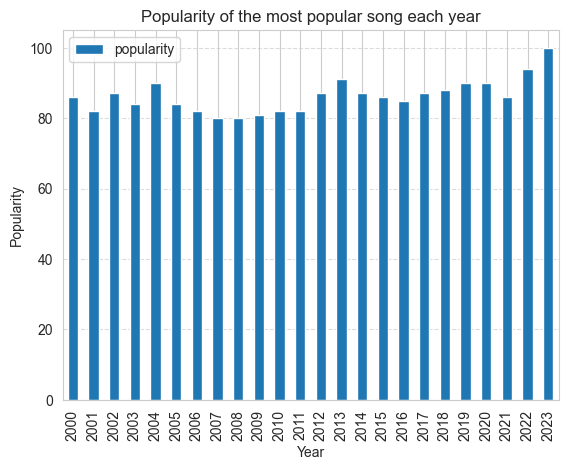

In [25]:
most_popular_song_per_year.plot(x='year', y='popularity', kind='bar', title='Popularity of the most popular song each year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Most popular genre each year

In [26]:
most_popular_genre_per_year = dataset.loc[dataset.groupby('year')['popularity'].idxmax()][['year', 'genre']]
most_popular_genre_per_year

,year,genre
645970,2000,hip-hop
693903,2001,metal
732739,2002,hip-hop
779182,2003,metal
817977,2004,hip-hop
845634,2005,dance
889676,2006,dance
946079,2007,garage
1010871,2008,rock
1047470,2009,hip-hop


However, we can see that the most popular genre each year is not always `pop`, it has started to be more popular in the last 10 years, which means that the most popular genre is not always the most popular genre of the year.

# Analysis of songs based on their audio features and their correlation
## Correlation matrix

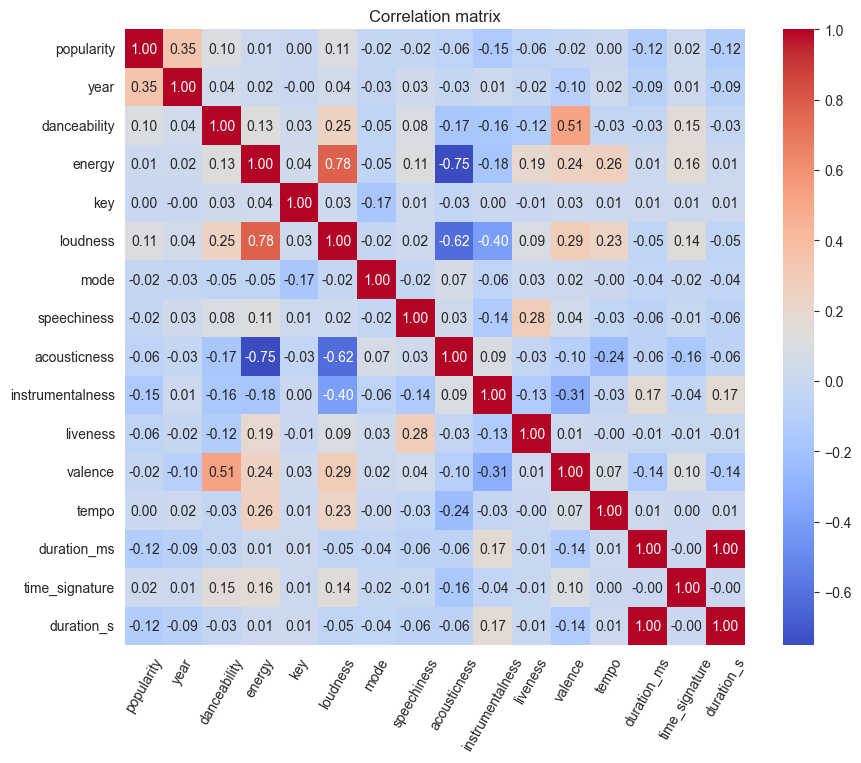

In [27]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=60)
plt.show()

### Creating a subset of the dataset
because of the large number of dataset entries, we will create a subset of the dataset to analyze the correlation between the audio features of the tracks

In [28]:
subset_10_percent = create_sample(dataset, 0.1)
subset_25_percent = create_sample(dataset, 0.25)

## Loudness vs Energy

In [29]:
palette = sns.color_palette('viridis', as_cmap=True)

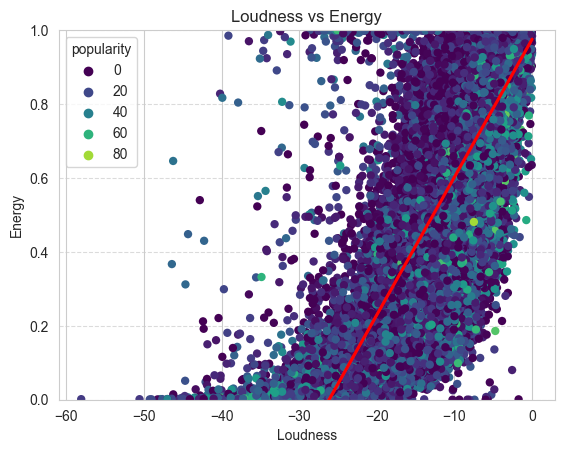

In [30]:
plot_data(subset_10_percent, 'loudness', 'energy', 'popularity')

As we can see, there is a positive correlation between loudness and energy, which means that the louder the track, the more energetic it is, which is expected because loudness contributes to the energetic atmosphere of the track.

## Acousticness vs Energy

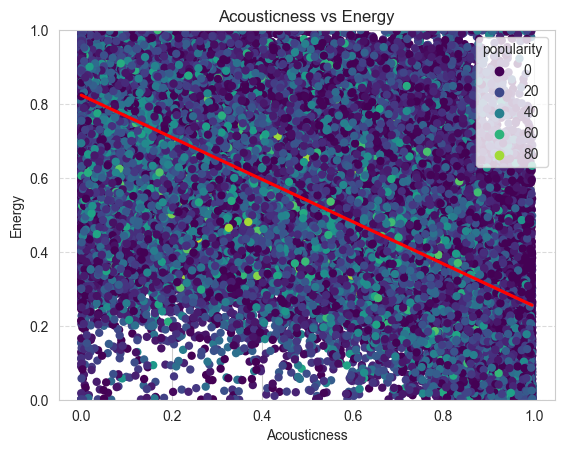

In [31]:
plot_data(subset_10_percent, 'acousticness', 'energy', 'popularity')

We can see that there is a negative correlation between acousticness and energy, which means that the more acoustic the track is, the less energetic it is, which is expected because acoustic tracks are usually more calm and less energetic.

## Valence vs Danceability

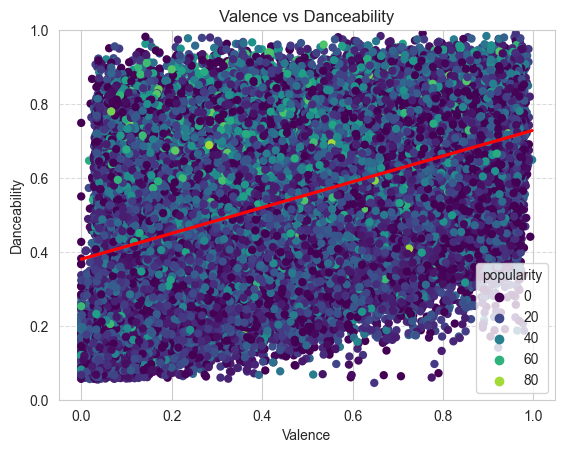

In [32]:
plot_data(subset_10_percent, 'valence', 'danceability', 'popularity')

As expected, there is a positive correlation between valence and danceability, which means that the more positive the track is, the more danceable it is

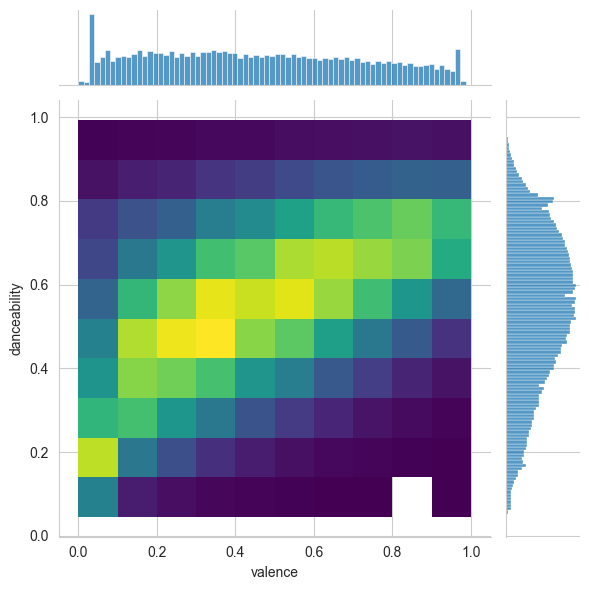

In [33]:
sns.jointplot(x='valence', y='danceability', data=subset_25_percent, kind='hist', cmap='viridis', bins=10)
plt.show()

From the graph above, we can see that most of the tracks have a valence between 0.3 and 0.7, and a danceability between 0.4 and 0.8, which means that most of the tracks are danceable and have a positive mood.

### Top tracks in each genre

In [34]:
interactive(top_tracks_per_genre, genre_name=dataset['genre'].unique(), number_of_tracks=(1, 50))

interactive(children=(Dropdown(description='genre_name', options=('acoustic', 'afrobeat', 'alt-rock', 'ambient…

In [39]:
interactive(top_tracks_per_artist, artist_name=np.sort(dataset['artist_name'].unique()), number_of_tracks=(1, 50))

interactive(children=(Dropdown(description='artist_name', options=('!!!', '!T.O.O.H.!', '"14"', '"DEMONS"', '"…